# Sprint 1 - EDA

**Objective:** Anomaly detection in Congress stock trades

**Author:** Tiffany Chu

**Date:** Mar 7, 2024

In [1]:
#importing preprocessing/visualization libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

The dataset consists of combined data from Senate stock transactions, stock news events, and S&P performance metrics. It covers the period from 2020 to 2023 and contains approximately 30,000 rows and 30 relevant columns.

#### Data Dictionary

**Here is some information about the columns in the US congress trades dataset:**
- transaction_date: Date of the transaction.
- owner: Owner of the asset (e.g., Senator, Spouse).
- ticker: Ticker symbol of the asset.
- asset_description: Description of the asset (e.g., company name, stock type).
- asset_type: Type of asset (e.g., Stock, Bond, Real Estate).
- type: Type of transaction (e.g., Sale (Full), Purchase, Exchange).
- amount: Amount of the transaction in USD.
- comment: Additional comments or remarks related to the transaction.
- party: Political party affiliation of the Senator.
- state: State represented by the Senator.
- industry: Industry classification of the asset.
- sector: Sector classification of the asset.
- senator: Name of the Senator associated with the transaction.
- ptr_link: URL link to the Public Financial Disclosure Report (PTR) on the Senate's website.
- disclosure_date: Date when the transaction was disclosed.

**Here is some information about the columns in the Stock news sentiment news dataset:** 
- Date: Date of the stock data.
- Open: Opening price of the stock.
- High: Highest price of the stock during the day.
- Low: Lowest price of the stock during the day.
- Close: Closing price of the stock.
- Adj Close: Adjusted closing price of the stock (accounts for dividends and stock splits).
- Volume: Volume of shares traded.
- Symbol: Ticker symbol of the stock.
- Security: Name of the company/security.
- GICS Sector: Sector classification of the company based on the Global Industry Classification Standard (GICS).
- GICS Sub-Industry: Sub-industry classification of the company based on the GICS.
- News - All News Volume: Total volume of news articles related to the company.
- News - Volume: Volume of news articles related to the company on the specific - date.
- News - Positive Sentiment: Number of news articles with positive sentiment regarding the company.
- News - Negative Sentiment: Number of news articles with negative sentiment regarding the company.
- News - New Products: Indicator for news articles related to new products.
- News - Layoffs: Indicator for news articles related to layoffs.
- News - Analyst Comments: Indicator for news articles related to analyst comments.
- News - Stocks: Indicator for news articles related to stocks.
- News - Dividends: Indicator for news articles related to dividends.
- News - Corporate Earnings: Indicator for news articles related to corporate earnings.
- News - Mergers & Acquisitions: Indicator for news articles related to mergers and acquisitions.
- News - Store Openings: Indicator for news articles related to store openings.
- News - Product Recalls: Indicator for news articles related to product recalls.
- News - Adverse Events: Indicator for news articles related to adverse events.
- News - Personnel Changes: Indicator for news articles related to personnel changes.
- News - Stock Rumors: Indicator for news articles related to stock rumors.
 

## Table of Contents

1. Wrangle, process & clean the data
    - preprocess and combine house.csv and senate.csv
    - preprocess stock news dataset
2. EDA - Exploratory Data Analysis
    - summary statistics
    - plots

## Wrangle, process & clean the data
### Combining senate and house datasets 
- to get all congress stock news in one dataset

In [2]:
raw_data = pd.read_csv(r"C:\Users\Tiffany\desktop\1sprint\house.csv")
raw_data2 = pd.read_csv(r"C:\Users\Tiffany\desktop\1sprint\senate.csv")

raw_data.head() #look at dataset

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,state,ptr_link,cap_gains_over_200_usd,industry,sector,party
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Integrated oil Companies,Energy,Republican
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Integrated oil Companies,Energy,Republican
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Real Estate Investment Trusts,Real Estate,Republican
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Virginia Foxx,NC05,NC,https://disclosures-clerk.house.gov/public_dis...,False,Farming/Seeds/Milling,Consumer Non-Durables,Republican
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Alan S. Lowenthal,CA47,CA,https://disclosures-clerk.house.gov/public_dis...,False,Investment Bankers/Brokers/Service,Finance,Democrat


#### Combining Senate and House of Commons dataset

Steps:
- First loading the data 
- then changing column names from 'representative' or 'senator' to 'name' so they can be in the same column, since both are in the category of Congress
- next keeping only relevant columns that both have in common
- then reordering the columns so that both datasets have the same column order
- lastly, merging on the specified columns

In [3]:
raw_data = pd.read_csv(r"C:\Users\Tiffany\desktop\1sprint\house.csv")
raw_data2 = pd.read_csv(r"C:\Users\Tiffany\desktop\1sprint\senate.csv")

#change column names from 'representative' or 'senator' to 'name' so they can be in the same column. Both in the category of Congress
raw_data2.rename(columns={'senator': 'name'}, inplace=True)
raw_data.rename(columns={'representative': 'name'}, inplace=True)

raw_data = raw_data[['transaction_date', 'owner', 'ticker', 'asset_description', 'type', 'amount', 'party', 'state', 'industry', 'sector', 'ptr_link', 'disclosure_date', 'name']]
raw_data2 = raw_data[['transaction_date', 'owner', 'ticker', 'asset_description', 'type', 'amount', 'party', 'state', 'industry', 'sector', 'ptr_link', 'disclosure_date', 'name']]

raw_data2 = raw_data2.reindex(columns=raw_data.columns)

In [4]:
raw_data = pd.merge(raw_data, raw_data2, on=['transaction_date', 'owner', 'ticker', 'asset_description', 'type', 'amount', 'party', 'state', 'industry', 'sector', 'ptr_link', 'disclosure_date', 'name'], how='inner')
raw_data.head()

,transaction_date,owner,ticker,asset_description,type,amount,party,state,industry,sector,ptr_link,disclosure_date,name
0,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Republican,NC,Integrated oil Companies,Energy,https://disclosures-clerk.house.gov/public_dis...,10/04/2021,Virginia Foxx
1,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Republican,NC,Integrated oil Companies,Energy,https://disclosures-clerk.house.gov/public_dis...,10/04/2021,Virginia Foxx
2,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Republican,NC,Real Estate Investment Trusts,Real Estate,https://disclosures-clerk.house.gov/public_dis...,10/04/2021,Virginia Foxx
3,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Republican,NC,Farming/Seeds/Milling,Consumer Non-Durables,https://disclosures-clerk.house.gov/public_dis...,10/04/2021,Virginia Foxx
4,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Democrat,CA,Investment Bankers/Brokers/Service,Finance,https://disclosures-clerk.house.gov/public_dis...,10/04/2021,Alan S. Lowenthal


##### changing columns to their right format

In [5]:
#change date disclosure and transaction column to yyyy-mm-dd
raw_data['disclosure_date'] = pd.to_datetime(raw_data['disclosure_date'], errors='coerce')
raw_data['transaction_date'] = pd.to_datetime(raw_data['transaction_date'], errors='coerce')

In [6]:
raw_data.shape

(18774, 13)

In [7]:
raw_data.info() #checking datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18774 entries, 0 to 18773
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_date   18762 non-null  datetime64[ns]
 1   owner              11612 non-null  object        
 2   ticker             18774 non-null  object        
 3   asset_description  18770 non-null  object        
 4   type               18774 non-null  object        
 5   amount             18774 non-null  object        
 6   party              18675 non-null  object        
 7   state              18774 non-null  object        
 8   industry           13815 non-null  object        
 9   sector             13815 non-null  object        
 10  ptr_link           18774 non-null  object        
 11  disclosure_date    18774 non-null  datetime64[ns]
 12  name               18774 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 1.9+ MB


In [8]:
(raw_data.isna().mean() * 100).round(2) #checking percentages of columns that contain nulls

transaction_date      0.06
owner                38.15
ticker                0.00
asset_description     0.02
type                  0.00
amount                0.00
party                 0.53
state                 0.00
industry             26.41
sector               26.41
ptr_link              0.00
disclosure_date       0.00
name                  0.00
dtype: float64

In [9]:
raw_data.isna().sum() # checking total sum of nulls in that column

transaction_date       12
owner                7162
ticker                  0
asset_description       4
type                    0
amount                  0
party                  99
state                   0
industry             4959
sector               4959
ptr_link                0
disclosure_date         0
name                    0
dtype: int64

##### Summary of Missing Values
Having nulls in owner, industry, and sector is alright, as it is not required for this to be included, oftentimes if it is empty, that insinuates it is owned by oneself. However, the missing transaction date, asset description, and party is unusual and there are unclear reasons for these missing values. 

I now investigate and fill in or delete rows with missing values

In [10]:
raw_data['owner'].value_counts() # to see category names in owner column

owner
joint        5867
self         3854
--           1343
dependent     548
Name: count, dtype: int64

In [11]:
nullrows = raw_data[raw_data[['industry', 'transaction_date']].isna().any(axis=1)]
print(nullrows)

      transaction_date  owner ticker  \
6           2021-11-30    NaN  KPLTW   
15          2021-10-07  joint   DUKH   
23          2022-09-08    NaN     --   
24          2022-09-08    NaN     --   
25          2022-09-14    NaN     --   
...                ...    ...    ...   
18721       2020-03-23  joint    UTX   
18730       2020-05-08  joint    CNI   
18734       2020-05-07  joint   CENT   
18741       2020-05-12  joint   GRUB   
18749       2020-05-11  joint  NSRGY   

                                       asset_description          type  \
6                        Katapult Holdings Inc - Warrant      purchase   
15     Duke Energy Corporation 5.125% Junior Subordin...     sale_full   
23                                   Harris County TX 5%     sale_full   
24                            Main Mun Bd BK 5% 09/01/27     sale_full   
25                               New York St 5% 06/15/27     sale_full   
...                                                  ...           ...   
1

**Since the transaction date must be at most 45 days before the disclosure date, we will assume this and input the 12 missing transaction dates with this**

In [12]:
#using the disclosure date column but with the date 45 days prior
raw_data['transaction_date'].fillna(raw_data['disclosure_date'] - pd.Timedelta(days=45), inplace=True)
print(raw_data['transaction_date'].isna().sum()) #check again, should be 0 after

0


In [13]:
#replace the null values in the 'owner' column with the string 'self' 
print(raw_data['owner'].isna().sum())
raw_data['owner'].fillna('self', inplace=True)
print(raw_data['owner'].isna().sum()) #check again, should be 0 after

7162
0


**Identifying party nulls and manually inputting**
- checked that the list of names where there is a missing party, has missing parties in ALL rows with that name, so the only choice is to manually input. Turns out theyre all democrats


In [14]:
rows_with_nulls = raw_data[raw_data['party'].isna()]
namelist = rows_with_nulls['name'].tolist()
pd.Series(namelist).value_counts()

Jared Moskowitz        35
Shri Thanedar          30
Jonathan Jackson       10
Max Miller              7
Morgan McGarvey         6
Eric Burlison           5
Ada Norah Henriquez     4
Jeff Jackson            2
Name: count, dtype: int64

In [15]:
raw_data['party'].fillna('Democrat', inplace=True) #replacing NaN with democrat
print(raw_data['party'].isna().sum()) #check again, should be 0 after

0


In [16]:
#replace the null values in the 'industry' column with the string 'na' 
print(raw_data['industry'].isna().sum())
raw_data['industry'].fillna('na', inplace=True)
print(raw_data['industry'].isna().sum()) #check again, should be 0 after

4959
0


In [17]:
#since the last 2 columns with missing values (industry and sector) are categories, change them to 'na'
raw_data.fillna('unknown', inplace=True)
print(raw_data.isna().sum()) #check again, should be 0 after

transaction_date     0
owner                0
ticker               0
asset_description    0
type                 0
amount               0
party                0
state                0
industry             0
sector               0
ptr_link             0
disclosure_date      0
name                 0
dtype: int64


In [18]:
raw_data.describe().T

,count,mean,min,25%,50%,75%,max
transaction_date,18774,2021-02-21 16:02:18.063279104,2012-06-19,2020-05-14,2021-01-15,2021-10-22,2023-12-22
disclosure_date,18774,2021-04-19 17:27:12.598274048,2020-01-02,2020-07-08,2021-03-03,2021-12-03,2023-05-14


### EDA

party
Democrat       11474
Jackson           14
Libertarian        5
Republican      7281
dtype: int64

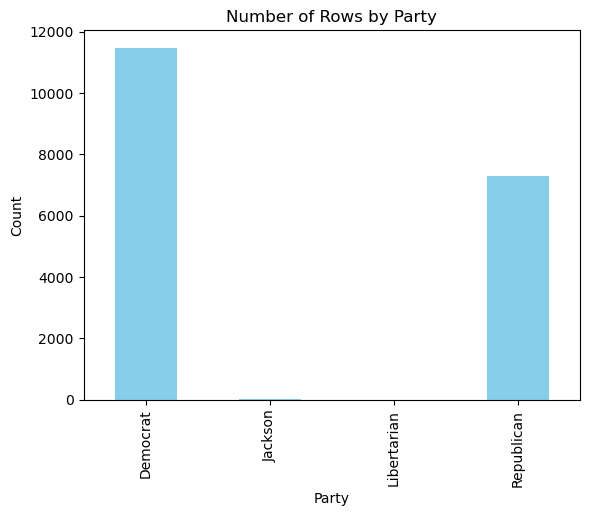

In [19]:
#bar chart showing the count of rows for each party after grouping
party_counts = raw_data.groupby('party').size()
party_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Rows by Party')
plt.xlabel('Party')
plt.ylabel('Count');

raw_data.groupby('party').size()

Text(0, 0.5, 'Count')

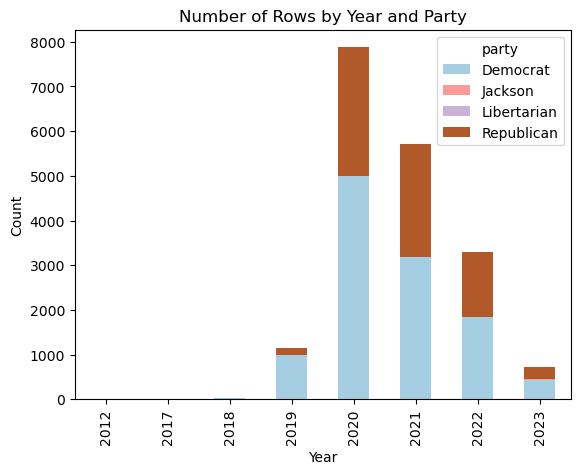

In [20]:
raw_data['year'] = raw_data['transaction_date'].dt.year

grouped_data1 = raw_data.groupby(['year', 'party']).size().unstack()
grouped_data1.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Number of Rows by Year and Party')
plt.xlabel('Year')
plt.ylabel('Count')

sector
unknown                   4959
Technology                2913
Health Care               1807
Finance                   1527
Consumer Services         1416
Energy                     922
Public Utilities           905
Consumer Discretionary     839
Capital Goods              739
Industrials                590
Consumer Non-Durables      501
Miscellaneous              487
Basic Industries           340
Real Estate                250
Consumer Durables          198
Transportation             153
Utilities                  110
Consumer Staples            54
Telecommunications          35
Basic Materials             29
Name: count, dtype: int64

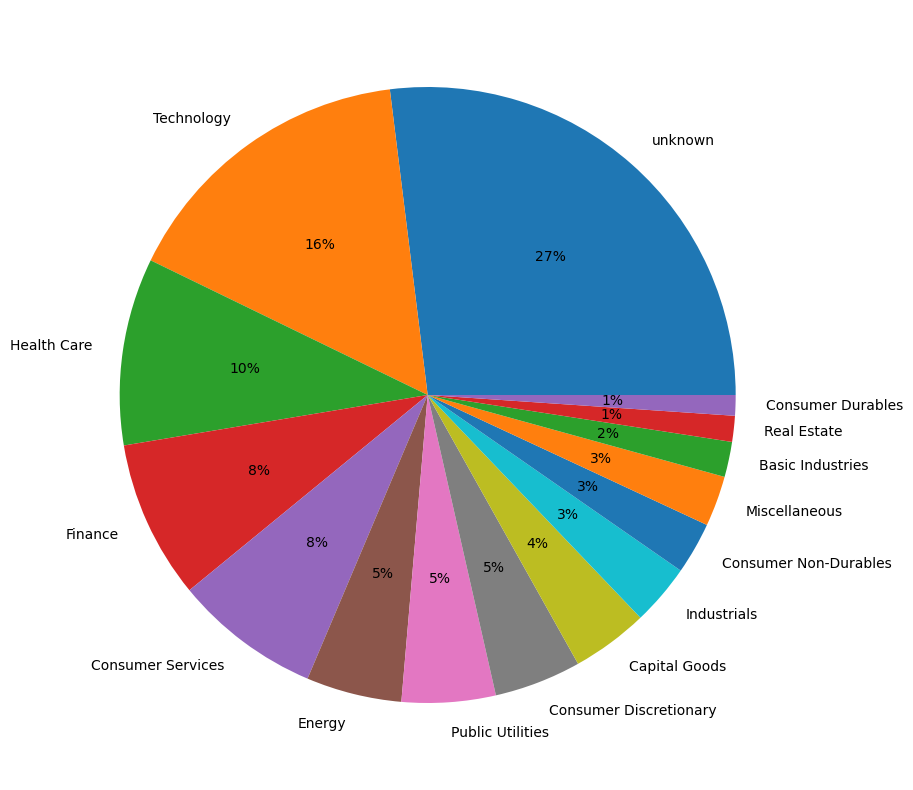

In [21]:
#pie chart showing the distribution of sectors in congress trades

sectorcounts = raw_data['sector'].value_counts()
percentages = sectorcounts / len(raw_data) * 100
sectorcounts1 = sectorcounts[percentages >= 1]
plt.figure(figsize=(10,10))  
plt.pie(sectorcounts1, labels=sectorcounts1.index, autopct='%1.f%%');

raw_data['sector'].value_counts()

Text(0, 0.5, 'Count')

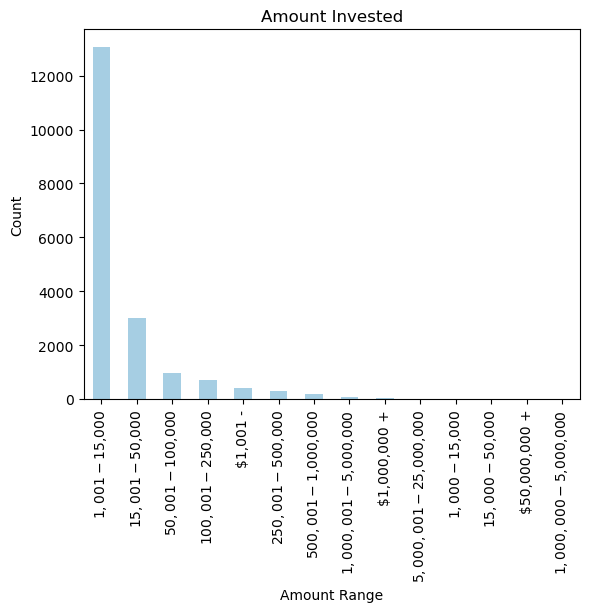

In [22]:
amt = raw_data['amount'].value_counts()

amt.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Amount Invested')
plt.xlabel('Amount Range')
plt.ylabel('Count')

In [23]:
raw_data['amount'].value_counts()

amount
$1,001 - $15,000            13064
$15,001 - $50,000            3010
$50,001 - $100,000            951
$100,001 - $250,000           717
$1,001 -                      391
$250,001 - $500,000           315
$500,001 - $1,000,000         199
$1,000,001 - $5,000,000        77
$1,000,000 +                   32
$5,000,001 - $25,000,000        9
$1,000 - $15,000                4
$15,000 - $50,000               3
$50,000,000 +                   1
$1,000,000 - $5,000,000         1
Name: count, dtype: int64

In [24]:
#feature engineering - 
#adding new column for upper bound to replicate amount but in a numerical format
raw_data['upper_bound'] = raw_data['amount'].str.split(' - ').str[-1]
#using regex 
raw_data['upper_bound'] = raw_data['upper_bound'].str.replace('[^\d]', '', regex=True).astype(float)
# values like $1,000,000 +  and $50,000,000 +   become NaNs, so change to their lower bound
raw_data['upper_bound'] = raw_data['upper_bound'].fillna(raw_data['amount'].str.split(' - ').str[0])
raw_data['upper_bound'].value_counts() #double checking


upper_bound
15000.0       13068
50000.0        3013
100000.0        951
250000.0        717
1001.0          391
500000.0        315
1000000.0       231
5000000.0        78
25000000.0        9
50000000.0        1
Name: count, dtype: int64

In [25]:
#filter data to include only amounts over $5,000,000
amt5mil = raw_data[raw_data['upper_bound'] > 500000]

#the representatives with amounts over $5,000,000
print(amt5mil[['upper_bound', 'name']].value_counts())

#amt5mil.groupby('name')['upper_bound'].sum().sort_values(ascending=False)

upper_bound  name                  
1000000.0    Suzan K. DelBene          45
             Scott H. Peters           41
             Nancy Pelosi              38
5000000.0    Josh Gottheimer           33
1000000.0    Mark E. Green             24
             Josh Gottheimer           22
5000000.0    Nancy Pelosi              19
1000000.0    Doris O. Matsui           13
             Michael T. McCaul          9
25000000.0   Suzan K. DelBene           6
5000000.0    Kevin Hern                 5
             Suzan K. DelBene           5
1000000.0    Kathy Manning              5
             Kevin Hern                 5
             Gilbert Cisneros           3
5000000.0    Scott Franklin             3
             Mark E. Green              3
1000000.0    Van Taylor                 3
             Trey Hollingsworth         3
5000000.0    Kim Schrier                2
1000000.0    Brad Sherman               2
             Kim Schrier                2
             Bradley S. Schneider       

In [26]:
raw_data.groupby('name')['upper_bound'].sum().sort_values(ascending=False).head(20)

name
Josh Gottheimer         300345000.0
Suzan K. DelBene        243325000.0
Nancy Pelosi            146432002.0
Kevin Hern              122795000.0
Mark E. Green           122430000.0
Scott H. Peters          63240000.0
Michael T. McCaul        48290000.0
Greg Gianforte           38400000.0
Donald S. Beyer, Jr.     29725000.0
Michael Waltz            26100000.0
K. Michael Conaway       21810000.0
Gilbert Cisneros         19675000.0
Virginia Foxx            19360000.0
Scott Franklin           19300000.0
Kim Schrier              18015000.0
Van Taylor               16210000.0
Kathy Manning            14990000.0
Doris O. Matsui          14865000.0
James R. Langevin        12840000.0
Alan S. Lowenthal        12162362.0
Name: upper_bound, dtype: float64

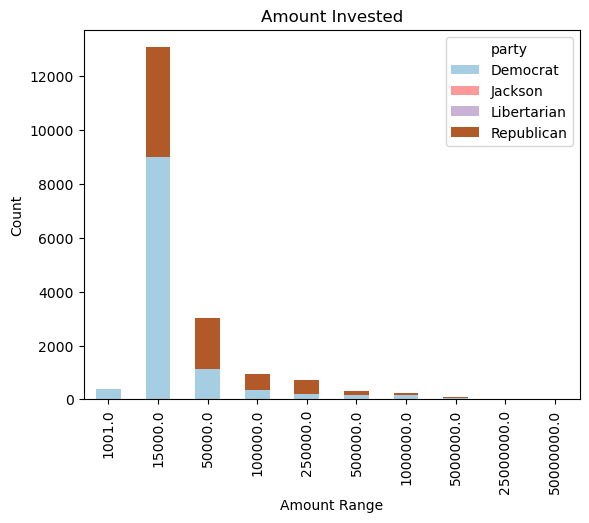

In [27]:
swag = raw_data.groupby(['upper_bound', 'party']).size().unstack()

#amt = raw_data['amount'].value_counts()
swag.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Amount Invested')
plt.xlabel('Amount Range')
plt.ylabel('Count')
plt.show()

### Adding S&P Stock Price based on transaction date
- (S&P) is a leading index provider and data source of independent credit ratings. The name comes from the merger of two financial data publications. For more than half a century, the S&P 500 has been an indicator for the performance of the stock market overall. Because it represents the largest publicly traded corporations in the US, its performance is seen as a snapshot of the state of US business, and by extension, the US economy. Here I use the S&P close price (adjusted), which is the final price at which the index traded on a particular trading day, after accounting for any corporate actions such as stock splits, dividends, or other adjustments that may affect the price -- a benchmark for evaluating the performance of top individual stocks

- Also adding the S&P volume, unlike a market index which suggests the market performance, the S&P 500 volume signifies the total number of shares of all securities traded on the S&P 500 index. It reflects the level of market activity -- higher volume indicates a higher number of traders that are interested in buying or selling, lower indicates a negative perception, it means that the price of a stock can decline shortly, and it can show a bearish pattern/ going down.

In [28]:
!pip install yfinance

In [29]:
import yfinance as yf

In [30]:
sp = "^GSPC"  #ticker symbol for S&P 500
sp500_data = yf.download(sp, start="2017-01-01", end="2024-01-01")
data = raw_data[raw_data['transaction_date'].dt.year >= 2017]

[*********************100%%**********************]  1 of 1 completed


In [31]:
sp500_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


In [32]:
# add/merge the S&P 500 data with the original dataset on the transaction date
data = pd.merge(raw_data, sp500_data[['Adj Close', 'Volume']], left_on='transaction_date', right_index=True, how='left')

#rename S&P data as a new column in raw_data
data.rename(columns={'Adj Close': 'SP500_Close'}, inplace=True)

#since data has unorganized dates in non-sequential rows, reorder it by sorting the
#dataset based on the date column
data.sort_values(by='transaction_date', inplace=True)

data.head()

,transaction_date,owner,ticker,asset_description,type,amount,party,state,industry,sector,ptr_link,disclosure_date,name,year,upper_bound,SP500_Close,Volume
12594,2012-06-19,self,BLFSD,BioLife Solutions Inc,purchase,"$1,001 - $15,000",Democrat,NJ,na,unknown,https://disclosures-clerk.house.gov/public_dis...,2021-08-26,Tom Malinowski,2012,15000.0,NaN,NaN
13574,2017-09-05,self,SUP,Superior Industries International Inc Common S...,purchase,"$1,001 - $15,000",Democrat,NY,Auto Parts:O.E.M.,Consumer Discretionary,https://disclosures-clerk.house.gov/public_dis...,2022-03-03,Thomas Suozzi,2017,15000.0,2457.850098,3.502190e+09
13555,2017-12-06,self,CAT,Caterpillar Inc,purchase,"$1,001 - $15,000",Democrat,NY,Construction/Ag Equipment/Trucks,Capital Goods,https://disclosures-clerk.house.gov/public_dis...,2022-03-03,Thomas Suozzi,2017,15000.0,2629.270020,3.253080e+09
13554,2018-04-17,self,BA,Boeing Company,purchase,"$15,001 - $50,000",Democrat,NY,Aerospace,Capital Goods,https://disclosures-clerk.house.gov/public_dis...,2022-03-03,Thomas Suozzi,2018,50000.0,2706.389893,3.286190e+09
13560,2018-04-30,self,CTRL,Control4 Corporation,purchase,"$1,001 - $15,000",Democrat,NY,na,unknown,https://disclosures-clerk.house.gov/public_dis...,2022-03-03,Thomas Suozzi,2018,15000.0,2648.050049,3.749510e+09


### Baseline time series analyses

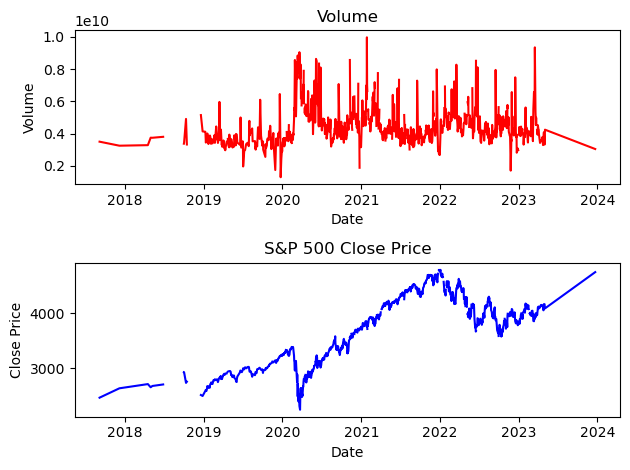

In [33]:
#since data has unorganized dates in non-sequential rows, reorder it by sorting the dataset based on the date column
data.sort_values(by='transaction_date', inplace=True)


# Plot Volume
plt.subplot(2, 1, 1)
plt.plot(data['transaction_date'], data['Volume'], color='red', linestyle='-')
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')

# Plot S&P 500 Close Price
plt.subplot(2, 1, 2)
plt.plot(data['transaction_date'], data['SP500_Close'], color='blue', linestyle='-')
plt.title('S&P 500 Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.tight_layout()

In the below blocks of code, I take an example senator and plot their investments into/out of the market over time, I also compare their investments the market. 

In [34]:
#using the Congress member: Nancy Pelosi

nancy_pelosi_data = data[data['name'] == 'Nancy Pelosi']

nancy_pelosi_data = nancy_pelosi_data[['transaction_date', 'upper_bound', 'type']]

nancy_pelosi_data.sort_values(by='transaction_date', inplace=True)

#make a column of 0s for net
nancy_pelosi_data['net'] = 0

#iterate over each row to update the 'net' column
net_sum = 0
for index, row in nancy_pelosi_data.iterrows():
    if row['type'] == 'purchase':
        net_sum += row['upper_bound']
    else:
        net_sum -= row['upper_bound']
    nancy_pelosi_data.at[index, 'net'] = net_sum

#turn into dataframe
pd.DataFrame(nancy_pelosi_data)

,transaction_date,upper_bound,type,net
8236,2020-01-16,500000.0,purchase,500000
8234,2020-01-16,500000.0,sale_full,0
8235,2020-01-16,500000.0,purchase,500000
8233,2020-01-16,500000.0,sale_full,0
8232,2020-01-16,5000000.0,purchase,5000000
...,...,...,...,...
9057,2022-12-29,500000.0,sale_partial,35568999
9058,2022-12-30,500000.0,sale_partial,35068999
337,2023-01-20,1001.0,sale_full,35067998
7642,2023-03-09,1000000.0,purchase,36067998


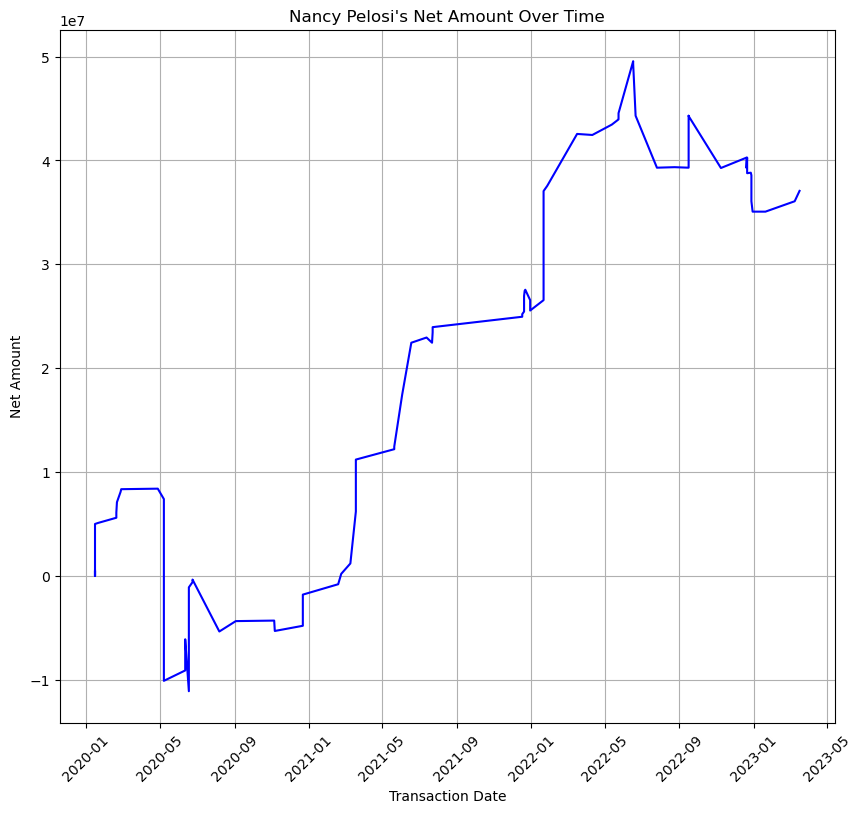

In [35]:
#plotting her net investments
plt.figure(figsize=(10, 9))
plt.plot(nancy_pelosi_data['transaction_date'], nancy_pelosi_data['net'], color='blue', linestyle='-')
plt.title("Nancy Pelosi's Net Amount Over Time")
plt.xlabel('Transaction Date')
plt.ylabel('Net Amount')
plt.grid(True)
plt.xticks(rotation=45);

Demonstrating how unscaled data looks. Pelosi's investments dominate other features in the data.

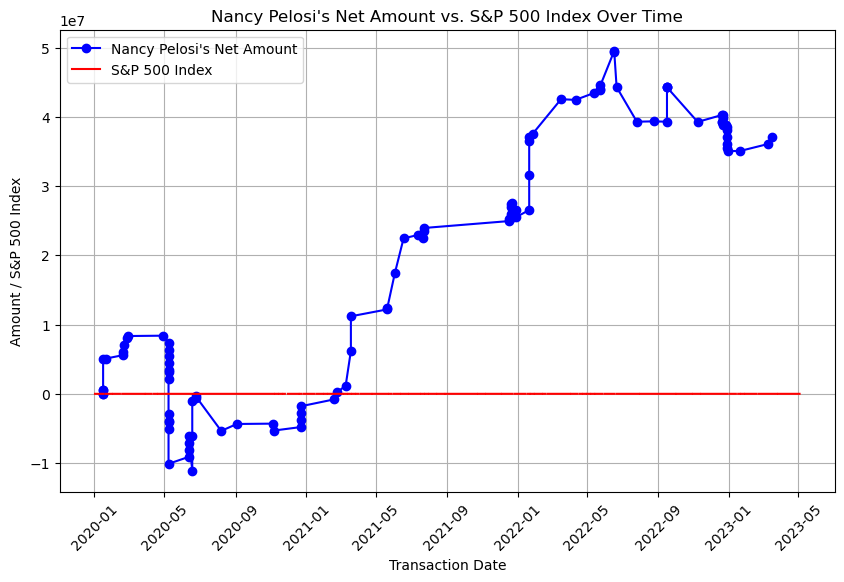

In [36]:
# pelosi's investments vs Market index Price

plt.figure(figsize=(10, 6))

#Nancy Pelosi's net amount over time
plt.plot(nancy_pelosi_data['transaction_date'], nancy_pelosi_data['net'], color='blue', marker='o', linestyle='-', label="Nancy Pelosi's Net Amount")

#filter S&P 500 data for the specified date range
sp500_filtered = data[(data['transaction_date'] >= '2020-01-01') & (data['transaction_date'] <= '2023-05-31')]

#plot sp500 too
plt.plot(sp500_filtered['transaction_date'], sp500_filtered['SP500_Close'], color='red', linestyle='-', label="S&P 500 Index")

plt.title("Nancy Pelosi's Net Amount vs. S&P 500 Index Over Time")
plt.xlabel('Transaction Date')
plt.ylabel('Amount / S&P 500 Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

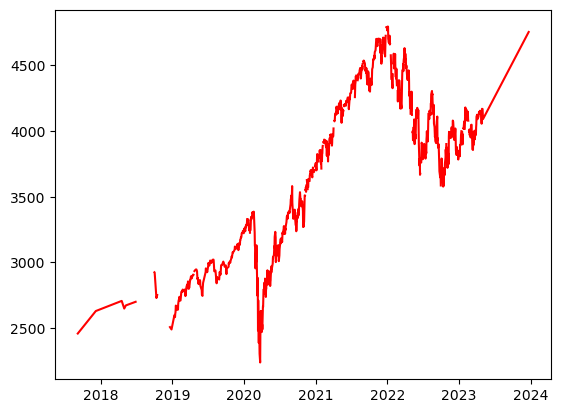

In [37]:
#this is how the S&P Index close price actually looks when not in comparison
plt.plot(data['transaction_date'], data['SP500_Close'], color='red', linestyle='-', label="S&P 500 Index")

similarly, adding a column to the dataset that has the calculated net amount of each congress member over time (like what was done with Nancy Pelosi) 

In [38]:
grouped_data = data.groupby('name')

result_df = pd.DataFrame()

#iterate over each group (aka congress member)
for name, group in grouped_data:
    group.sort_values(by='transaction_date', inplace=True)
    # fill net with 0s
    group['net'] = 0
    #initialize net_sum
    net_sum = 0
    
    #update the 'net' column same as nancy pelosi
    for index, row in group.iterrows():
        if row['type'] == 'purchase':
            net_sum += row['upper_bound']
        else:
            net_sum -= row['upper_bound']
        group.at[index, 'net'] = net_sum
    
    # Append the group (congress member) to the result DataFrame
    result_df = pd.concat([result_df, group], ignore_index=True)

# Display the resulting DataFrame
result_df.sort_values(by='transaction_date', inplace=True)

data = result_df

data.head()

,transaction_date,owner,ticker,asset_description,type,amount,party,state,industry,sector,ptr_link,disclosure_date,name,year,upper_bound,SP500_Close,Volume,net
17668,2012-06-19,self,BLFSD,BioLife Solutions Inc,purchase,"$1,001 - $15,000",Democrat,NJ,na,unknown,https://disclosures-clerk.house.gov/public_dis...,2021-08-26,Tom Malinowski,2012,15000.0,NaN,NaN,15000
17534,2017-09-05,self,SUP,Superior Industries International Inc Common S...,purchase,"$1,001 - $15,000",Democrat,NY,Auto Parts:O.E.M.,Consumer Discretionary,https://disclosures-clerk.house.gov/public_dis...,2022-03-03,Thomas Suozzi,2017,15000.0,2457.850098,3.502190e+09,15000
17535,2017-12-06,self,CAT,Caterpillar Inc,purchase,"$1,001 - $15,000",Democrat,NY,Construction/Ag Equipment/Trucks,Capital Goods,https://disclosures-clerk.house.gov/public_dis...,2022-03-03,Thomas Suozzi,2017,15000.0,2629.270020,3.253080e+09,30000
17536,2018-04-17,self,BA,Boeing Company,purchase,"$15,001 - $50,000",Democrat,NY,Aerospace,Capital Goods,https://disclosures-clerk.house.gov/public_dis...,2022-03-03,Thomas Suozzi,2018,50000.0,2706.389893,3.286190e+09,80000
17537,2018-04-30,self,CTRL,Control4 Corporation,purchase,"$1,001 - $15,000",Democrat,NY,na,unknown,https://disclosures-clerk.house.gov/public_dis...,2022-03-03,Thomas Suozzi,2018,15000.0,2648.050049,3.749510e+09,95000


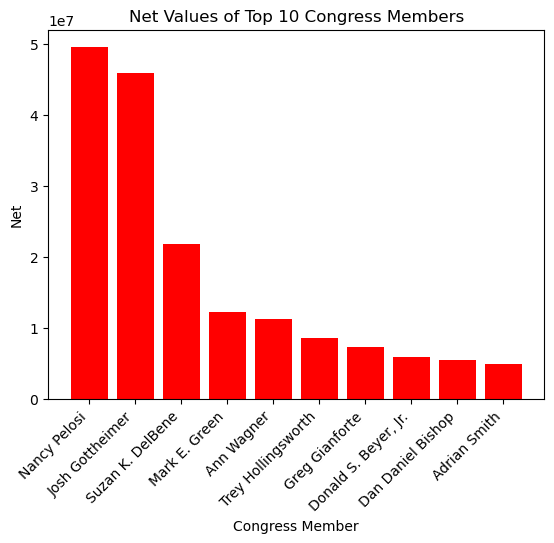

In [39]:
#extract the 10 congress members with the highest net
highest_net = data.sort_values(by='net', ascending=False)
top_net_names = highest_net['name'].unique()[:10]
top_net_values = highest_net[highest_net['name'].isin(top_net_names)].groupby('name')['net'].max().sort_values(ascending=False)

plt.bar(top_net_names, top_net_values, color='red', label='Highest Net')
plt.xlabel('Congress Member')
plt.ylabel('Net')
plt.title('Net Values of Top 10 Congress Members')
plt.xticks(rotation=45, ha='right');


In [40]:
result_df['transaction_unix_timestamp'] = result_df['transaction_date'].astype('int64') // 10**9
result_df['disclosure_unix_timestamp'] = result_df['disclosure_date'].astype('int64') // 10**9

In [41]:
col_drop = ['transaction_date', 'disclosure_date']
result_df = result_df.drop(columns=col_drop)
result_df.head()

,owner,ticker,asset_description,type,amount,party,state,industry,sector,ptr_link,name,year,upper_bound,SP500_Close,Volume,net,transaction_unix_timestamp,disclosure_unix_timestamp
17668,self,BLFSD,BioLife Solutions Inc,purchase,"$1,001 - $15,000",Democrat,NJ,na,unknown,https://disclosures-clerk.house.gov/public_dis...,Tom Malinowski,2012,15000.0,NaN,NaN,15000,1340064000,1629936000
17534,self,SUP,Superior Industries International Inc Common S...,purchase,"$1,001 - $15,000",Democrat,NY,Auto Parts:O.E.M.,Consumer Discretionary,https://disclosures-clerk.house.gov/public_dis...,Thomas Suozzi,2017,15000.0,2457.850098,3.502190e+09,15000,1504569600,1646265600
17535,self,CAT,Caterpillar Inc,purchase,"$1,001 - $15,000",Democrat,NY,Construction/Ag Equipment/Trucks,Capital Goods,https://disclosures-clerk.house.gov/public_dis...,Thomas Suozzi,2017,15000.0,2629.270020,3.253080e+09,30000,1512518400,1646265600
17536,self,BA,Boeing Company,purchase,"$15,001 - $50,000",Democrat,NY,Aerospace,Capital Goods,https://disclosures-clerk.house.gov/public_dis...,Thomas Suozzi,2018,50000.0,2706.389893,3.286190e+09,80000,1523923200,1646265600
17537,self,CTRL,Control4 Corporation,purchase,"$1,001 - $15,000",Democrat,NY,na,unknown,https://disclosures-clerk.house.gov/public_dis...,Thomas Suozzi,2018,15000.0,2648.050049,3.749510e+09,95000,1525046400,1646265600


## Scaling data

Columns that need scaling are numerical features that are not binary or ordinal. In this dataset, the following columns:

- upper_bound: Amount of the transaction in USD
- SP500_close: The closing price of the market index
- Volume: Volume of trades for the day.

These columns contain numerical values that need to be scaled because it ensures that all features contribute equally to the analysis, and prevents features with larger scales from dominating the model. So, I use **Robust Scaling:**, It is suitable when dealing with datasets containing outliers, as it is less affected by them compared to Min-Max Scaling and Standardization, since its also ROBUST to outliers. 

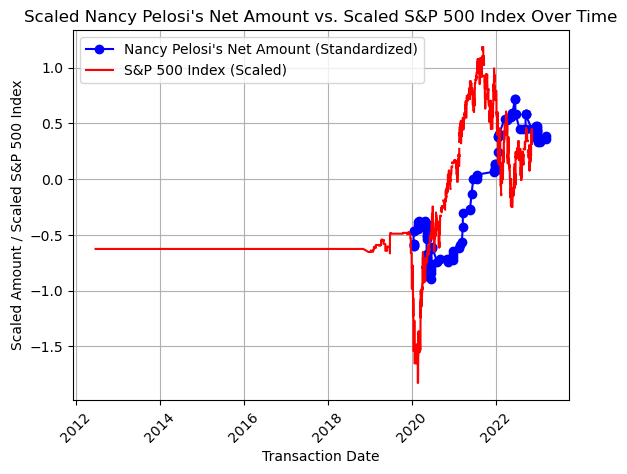

In [42]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

sp = sp500_filtered['SP500_Close'].values.reshape(-1, 1)
pelosi = nancy_pelosi_data['net'].values.reshape(-1, 1)

pelosi_scale = scaler.fit_transform(pelosi)
sp_scale = scaler.fit_transform(sp)

#plotting post-scaling
plt.plot(nancy_pelosi_data['transaction_date'], pelosi_scale, color='blue', marker='o', linestyle='-', label="Nancy Pelosi's Net Amount (Standardized)")
filtered_dates = data['transaction_date'].iloc[:len(sp_scale)]
plt.plot(filtered_dates, sp_scale, color='red', linestyle='-', label="S&P 500 Index (Scaled)")
plt.title("Scaled Nancy Pelosi's Net Amount vs. Scaled S&P 500 Index Over Time")
plt.xlabel('Transaction Date')
plt.ylabel('Scaled Amount / Scaled S&P 500 Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

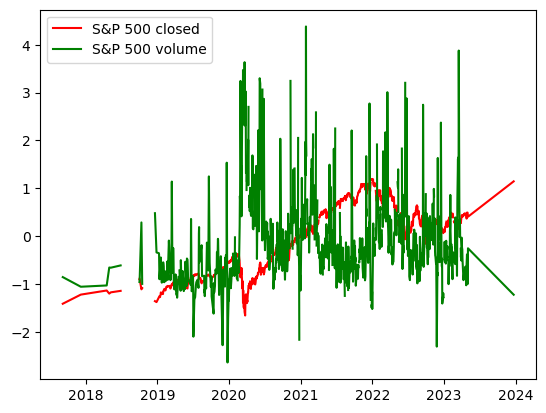

In [43]:
sp1 = data['SP500_Close'].values.reshape(-1, 1)
sp_scale1 = scaler.fit_transform(sp1)

vol1 = data['Volume'].values.reshape(-1, 1)
vol_scale1 = scaler.fit_transform(vol1)

plt.plot(data['transaction_date'], sp_scale1, color='red', linestyle='-', label="S&P 500 closed")
#plt.plot(data['transaction_date'], upper_bound_scale, color='blue', linestyle='-', label="S&P 500 closed")
plt.plot(data['transaction_date'], vol_scale1, color='green', linestyle='-', label="S&P 500 volume")
plt.legend()

## One Hot Encoding
type, party, industry, sector, owner -- are all categorical columns that can be turned into dummy variables for each category item

In [52]:
from sklearn.preprocessing import StandardScaler
#scale numerical columns 
numerical_columns = ['year', 'upper_bound', 'SP500_Close', 'Volume', 'net', 'transaction_unix_timestamp', 'disclosure_unix_timestamp']

scaler = StandardScaler()
result_df[numerical_columns] = scaler.fit_transform(result_df[numerical_columns])

object_columns = ['owner', 'type', 'party', 'industry', 'sector', 'name']
data_dummies = pd.get_dummies(result_df, columns=object_columns)

col_drop = ['amount', 'state', 'ticker', 'asset_description', 'ptr_link', 'year']
data_dummies = data_dummies.drop(columns=col_drop)

In [54]:
#removing NaNs in columns, theres 2 rows
data_dummies = data_dummies.dropna().replace([np.inf, -np.inf], np.nan).dropna()

data_dummies.shape

(18667, 377)

In [56]:
booleans = data_dummies.select_dtypes(include=bool).columns
data_dummies[booleans] = data_dummies[booleans].astype(int)

In [57]:
data_dummies.head() #checking to see if scaling and one hot encoding worked as intended

,year,upper_bound,SP500_Close,Volume,net,transaction_unix_timestamp,disclosure_unix_timestamp,owner_--,owner_dependent,owner_joint,...,name_Van Taylor,name_Vern Buchanan,name_Vicente Gonzalez,name_Victoria Spartz,name_Virginia Foxx,name_W. Gregory Steube,name_William R. Keating,name_William R. Timmons,name_Wm. Lacy Clay,name_Zoe Lofgren
17534,-3.858807,-0.100195,-1.956683,-1.020315,0.068212,-3.618599,0.971330,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17535,-3.858807,-0.100195,-1.673168,-1.208407,0.069868,-3.355567,0.971330,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17536,-2.818136,-0.052942,-1.545617,-1.183407,0.075389,-2.978174,0.971330,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17537,-2.818136,-0.100195,-1.642107,-0.833575,0.077045,-2.941006,0.971330,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17538,-2.818136,-0.100195,-1.602628,-0.836905,0.075389,-2.918134,0.971330,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5572,2.385216,0.217072,0.871560,-1.156845,-0.213352,2.282464,2.293898,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5575,2.385216,0.217072,0.871560,-1.156845,-0.296165,2.282464,2.293898,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17990,2.385216,-0.100195,0.744009,-0.458313,0.144952,2.288182,2.296960,0,1,0,...,0,0,0,1,0,0,0,0,0,0
17991,2.385216,-0.100195,0.744009,-0.458313,0.146608,2.288182,2.296960,0,1,0,...,0,0,0,1,0,0,0,0,0,0


## Modelling

### Clustering 
- hoping to find two clusters - anomaly and non-anomaly 
- then running an autoencorder to get anomaly-labelled ones
- finally comparing the two to see if the results are the same 
-

- score is positive, which generally indicates that the clusters are well-separated
- but relatively close to 0, suggesting some degree of overlap between clusters or some points being close to the decision boundary
- Overall, a silhouette score of 0.2123 indicates a reasonable level of separation between clusters

In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

agglomerative_clustering = AgglomerativeClustering(n_clusters=2) #2 clusters

cluster_labels = agglomerative_clustering.fit_predict(data_dummies)

silhouette_avg = silhouette_score(data_dummies, cluster_labels)

silhouette_avg

0.21231879802678139

In [59]:
#threshold for silhouette score to identify anomalous points
threshold = 0

#the indices of anomalous points based on silhouette score
anomalous_indices = np.where(silhouette_samples(data_dummies, cluster_labels) < threshold)[0]


In [60]:
anomalous_df = data_dummies.iloc[anomalous_indices]
anomalous_df
#965 out of 18667 rows were marked as anomalous, that's 5% of rows

,year,upper_bound,SP500_Close,Volume,net,transaction_unix_timestamp,disclosure_unix_timestamp,owner_--,owner_dependent,owner_joint,...,name_Van Taylor,name_Vern Buchanan,name_Vicente Gonzalez,name_Victoria Spartz,name_Virginia Foxx,name_W. Gregory Steube,name_William R. Keating,name_William R. Timmons,name_Wm. Lacy Clay,name_Zoe Lofgren
3596,-1.777466,6.629919,-1.077060,-1.225592,0.618643,-1.414277,-1.450316,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11131,-0.736795,0.217072,-0.605676,-0.915333,-5.536022,-1.171259,0.310047,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14818,-0.736795,6.629919,-0.536029,-0.991329,0.618643,-1.151246,-1.327856,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11132,-0.736795,-0.100195,-0.567817,-0.646782,-5.534365,-1.096924,-1.220703,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11138,-0.736795,-0.100195,-0.431253,-1.082600,-5.524428,-1.068333,-1.220703,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17111,0.303875,-0.100195,0.902737,-0.862879,0.118894,0.183927,0.062065,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13745,0.303875,1.229627,0.926156,1.172456,1.248574,0.269698,0.147787,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13751,0.303875,0.217072,1.003162,-0.784119,1.215449,0.312584,0.178402,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13760,0.303875,0.217072,1.205123,-0.998472,1.198886,0.392637,0.258001,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#merge the one-hot encoded df with the original df (result_df pre dummified) based on their indices
anomalous_df = result_df.iloc[anomalous_indices].merge(data_dummies.iloc[anomalous_indices], left_index=True, right_index=True)

anomalous_df['name'].unique() #get names out of anomalous df LOOK INTO THEM

array(['Kevin Hern', 'Chris Jacobs', 'Josh Gottheimer',
       'Michael T. McCaul', 'Gilbert Cisneros', 'Doug Lamborn',
       'Kenny Marchant', 'Kurt Schrader', 'Lois Frankel', 'James Comer',
       'Dean Phillips', 'Garret Graves', 'Susie Lee', 'Virginia Foxx',
       'Tom Malinowski', 'Billy Long', 'Marie Newman',
       'Michael K. Simpson', 'Deborah K. Ross', 'Ro Khanna',
       'Suzan K. DelBene', 'Donald S. Beyer, Jr.', 'Alan S. Lowenthal',
       'Austin Scott', 'Kathy Manning', 'Doris O. Matsui', 'Peter Meijer',
       'John A. Yarmuth', 'James R. Langevin', 'David E. Price',
       'Kathy Castor', 'Katherine M. Clark'], dtype=object)

### Autoencoders
first using autoencoders -- are often used in unsupervised anomaly detection settings where labeled data for training and testing are not available

In [62]:
import tensorflow as tf
from tensorflow import random as tf_random
from tensorflow import keras
from tensorflow.keras import layers

# random seeds for reproducibility
np.random.seed(123)
tf_random.set_seed(123)

#encoder
encoder = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(6, activation="relu")  #bottleneck
])

#decoder
decoder = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(377, activation='sigmoid')  #match the number of features in the input data
])

#combine encoder and decoder into the autoencoder
autoencoder = keras.Sequential([encoder, decoder])

#compile model
autoencoder.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)

#training
history = autoencoder.fit(
    data_dummies.values, data_dummies.values,  # Input and target are the same for reconstruction
    epochs=50,
    batch_size=32,
    verbose=0
)


In [63]:
#reconstruct the data
reconstructed_data = autoencoder.predict(data_dummies.values)

#reconstruction error
reconstruction_errors = np.mean(np.square(data_dummies.values - reconstructed_data))

reconstruction_errors

584/584 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


0.017209564306398167

a MSE of 0.0166 suggests that, on average, the reconstruction error is relatively low, indicating that the autoencoder is performing well in reconstructing the input data

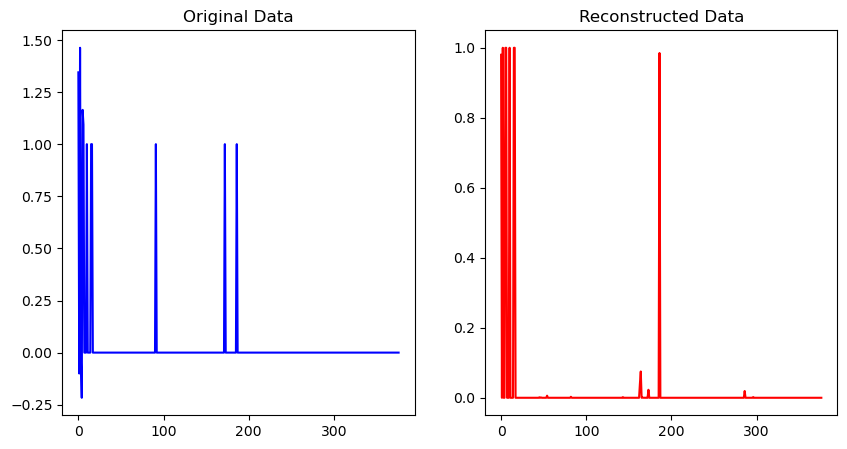

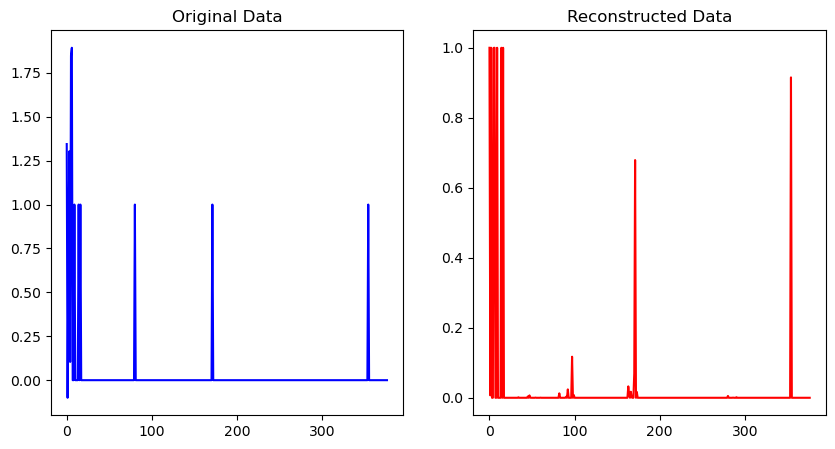

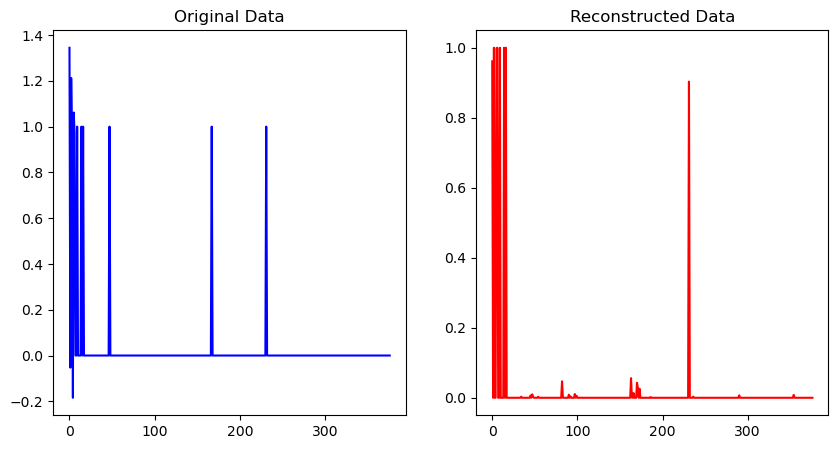

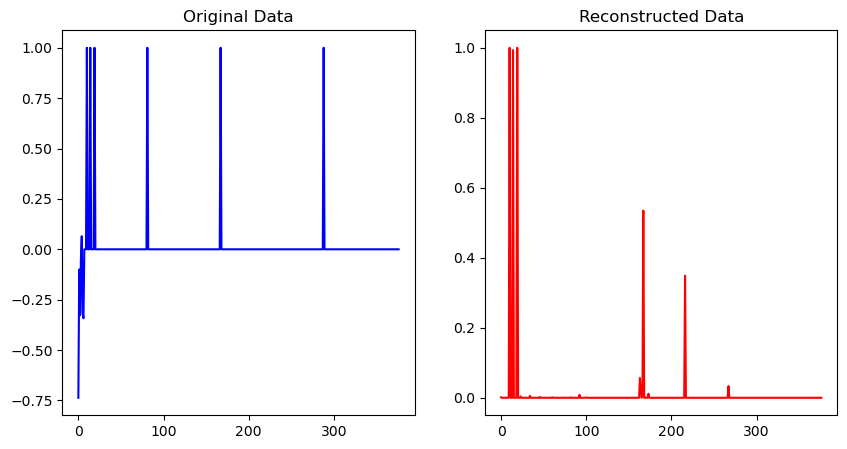

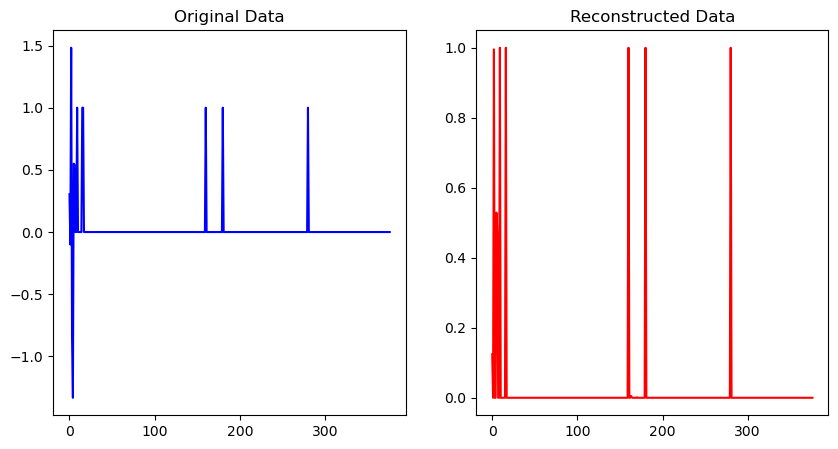

In [64]:
import matplotlib.pyplot as plt

indices_to_visualize = np.random.randint(0, len(data_dummies), size=5)

for i in indices_to_visualize:
    original_data = data_dummies.iloc[i]
    reconstructed_data_point = reconstructed_data[i]
    
    original_data = original_data.values.reshape((-1,))
    reconstructed_data_point = reconstructed_data_point.reshape((-1,))
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Data")
    plt.plot(original_data, color='blue')
    
    plt.subplot(1, 2, 2)
    plt.title("Reconstructed Data")
    plt.plot(reconstructed_data_point, color='red')
    
    plt.show()


In [65]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')

KeyError: 'val_loss'

In [ ]:
#next steps...

#extract the encoder part from the trained autoencoder model
#encoded representation w/ reduced dimensions compared to the original input data

### Isolation forest

In [ ]:
from sklearn.ensemble import IsolationForest

data_dummies.dropna(inplace=True)

#train and fit
isolation_forest = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=42)
isolation_forest.fit(data_dummies)

predictions = isolation_forest.predict(data_dummies)

anomaly_scores = isolation_forest.decision_function(data_dummies)

np.where(predictions == -1)[0]

In [ ]:
#next steps:  precision, recall, F1-score, ROC curve analysis,